In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

pd.set_option('display.max_columns', 24)

Загрузим данные из Excel в Pandas dataframe:

In [2]:
df = pd.read_excel('Задание.xlsx', nrows=12, header=1, index_col=0)
df

,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01
2019-01-01,2864,1528,1380,1285,1246,1215,1162,1128,1096,1075,1058,1058
2019-02-01,0,2813,1574,1375,1299,1254,1202,1165,1133,1109,1082,1085
2019-03-01,0,0,3435,1822,1613,1515,1451,1400,1376,1348,1314,1303
2019-04-01,0,0,0,3024,1702,1506,1418,1366,1328,1310,1271,1252
2019-05-01,0,0,0,0,3130,1792,1596,1509,1460,1416,1384,1360
2019-06-01,0,0,0,0,0,3195,1678,1513,1432,1387,1341,1328
2019-07-01,0,0,0,0,0,0,3156,1481,1321,1255,1208,1189
2019-08-01,0,0,0,0,0,0,0,3157,1482,1340,1266,1238
2019-09-01,0,0,0,0,0,0,0,0,3385,1748,1587,1524
2019-10-01,0,0,0,0,0,0,0,0,0,3337,1807,1660


Преобразуем типы индексов и колонки (необязательно, просто для того, чтобы в будущем смотрелось консистентно):

In [3]:
df.columns = df.columns.map(str)
df.index = df.index.map(str)

Создадим список из 12 месяцев 2020 года и начнём расширять датафрейм, добавив 12 нулевых строчек снизу:

In [4]:
year_2020 = ['2020-01-01 00:00:00', '2020-02-01 00:00:00', '2020-03-01 00:00:00', '2020-04-01 00:00:00', '2020-05-01 00:00:00', '2020-06-01 00:00:00', '2020-07-01 00:00:00', '2020-08-01 00:00:00', '2020-09-01 00:00:00', '2020-10-01 00:00:00', '2020-11-01 00:00:00', '2020-12-01 00:00:00']

for year in year_2020:
    df.loc[year] = [0 for i in range(12)]

Считаем данные по прогнозу новых пользователей, добавим новые колонки, заполним датафрейм прогнозами и None и поменяем типы:

In [5]:
predicted_values = pd.read_excel('Задание.xlsx', nrows=1, skiprows=17, usecols=range(1, 13))

for col in year_2020:
    df[col] = None

for i in range(12, 24):
    df.iloc[i, i] = predicted_values.iloc[0, i-12]

df = df.astype('float64')
df.columns = pd.to_datetime(df.columns)

После всех проебразований датафрейм выглядит так:

In [6]:
df

,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,2020-01-01,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01,2020-12-01
2019-01-01 00:00:00,2864.0,1528.0,1380.0,1285.0,1246.0,1215.0,1162.0,1128.0,1096.0,1075.0,1058.0,1058.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-01 00:00:00,0.0,2813.0,1574.0,1375.0,1299.0,1254.0,1202.0,1165.0,1133.0,1109.0,1082.0,1085.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-01 00:00:00,0.0,0.0,3435.0,1822.0,1613.0,1515.0,1451.0,1400.0,1376.0,1348.0,1314.0,1303.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-01 00:00:00,0.0,0.0,0.0,3024.0,1702.0,1506.0,1418.0,1366.0,1328.0,1310.0,1271.0,1252.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-01 00:00:00,0.0,0.0,0.0,0.0,3130.0,1792.0,1596.0,1509.0,1460.0,1416.0,1384.0,1360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-01 00:00:00,0.0,0.0,0.0,0.0,0.0,3195.0,1678.0,1513.0,1432.0,1387.0,1341.0,1328.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,3156.0,1481.0,1321.0,1255.0,1208.0,1189.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3157.0,1482.0,1340.0,1266.0,1238.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3385.0,1748.0,1587.0,1524.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3337.0,1807.0,1660.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Теперь нужно заполнить отсутствующие данные. Задача делится на две подзадачи:
1. Спрогнозировать сколько пользователей, пришедших в определенный месяц 2020 года, останется в последующих месяцах 2020 года (нижняя половина таблицы)
2. Спрогнозировать сколько пользователей, пришедших в 2019 году, останется в 2020 году (верхняя половина таблицы)

Начнём с первого пункта. 

Разумеется, по имеющимся данным точного ответ дать нельзя, поэтому так или иначе придётся применять эвристики. Я исходил из следующих соображений: присутствует сезонность, то есть для месяца 2020 года можно опираться на данные того же месяца 2019 года. Поэтому можно просто скопировать соответствующую строчку из первой части таблицы во вторую. Но можно ещё домножить на коэффициент, который равняется отношению прогнозируемого количества пользователей в этот месяц к количеству пользователей, пришедших в тот же месяц в 2019 году. 

Проще рассмотреть пример. Допустим, в октябре 2019 года пришло $3337$ пользователей, в ноябре 2019 — $1807$, а в декабре 2019 — $1660$. На октябрь 2020 года планируется $3500$ новых пользователей. Тогда коэффициент $k=\frac{3500}{3337}=1.04884...$ нужно умножить на вектор $(3337, 1807, 1660)$, получим $(3500, 1895.27, 1741.08)$. Это и будет прогноз пользователей на октябрь, ноябрь, декабрь 2020 года.

In [7]:
for i in range(12, 24):
    for j in range(i+1, 24):
        df.iloc[i, j] = df.iloc[i-12, j-12] *  df.iloc[i, i] / df.iloc[i-12, i-12]

Нижняя правая часть датафрейма заполнена:

In [8]:
df.iloc[12:24, 12:24]

,2020-01-01,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01,2020-12-01
2020-01-01 00:00:00,2600.0,1387.150838,1252.793296,1166.550279,1131.145251,1103.002793,1054.888268,1024.022346,994.972067,975.907821,960.474860,960.474860
2020-02-01 00:00:00,NaN,2800.000000,1566.725915,1368.645574,1292.996801,1248.204764,1196.445076,1159.616068,1127.763953,1103.874867,1076.999645,1079.985780
2020-03-01 00:00:00,NaN,NaN,3900.000000,2068.646288,1831.353712,1720.087336,1647.423581,1589.519651,1562.270742,1530.480349,1491.877729,1479.388646
2020-04-01 00:00:00,NaN,NaN,NaN,3600.000000,2026.190476,1792.857143,1688.095238,1626.190476,1580.952381,1559.523810,1513.095238,1490.476190
2020-05-01 00:00:00,NaN,NaN,NaN,NaN,3700.000000,2118.338658,1886.645367,1783.801917,1725.878594,1673.865815,1636.038339,1607.667732
2020-06-01 00:00:00,NaN,NaN,NaN,NaN,NaN,3500.000000,1838.184664,1657.433490,1568.701095,1519.405321,1469.014085,1454.773083
2020-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,3400.000000,1595.500634,1423.130545,1352.027883,1301.394170,1280.925222
2020-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3200.000000,1502.185619,1358.251505,1283.243586,1254.862211
2020-09-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3300.000000,1704.106352,1547.149188,1485.731167
2020-10-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3500.000000,1895.265208,1741.084807


Теперь нужно заполнить верхнюю правую часть датафрейма. 

По сути нам нужно продолжить ряд чисел правдоподобным образом. Давайте посмотрим на то, как выглядят графики за какие-нибудь месяца (по оси x — месяца, по оси y — количество пользователей, оставшихся с начального месяца). 

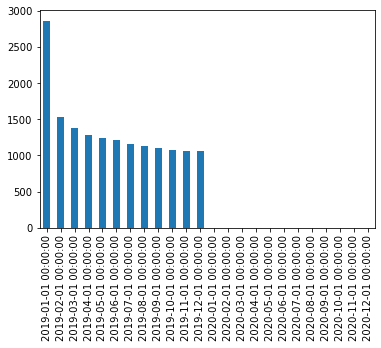

In [9]:
#Январь 2019
df.iloc[0].plot(kind='bar')

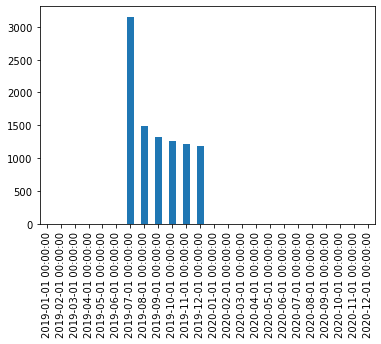

In [11]:
#Июнь 2019
df.iloc[6].plot(kind='bar')

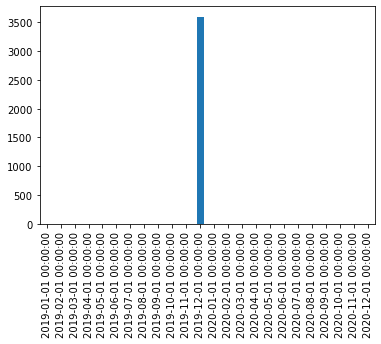

In [12]:
#Декабрь 2019
df.iloc[11].plot(kind='bar')

Конечно, количество данных убывает от января к декабрю. Но в целом функция количества пользователей является выпуклой и убывающей к какой-то горизонтальной асимптоте (т.е. со временем темп скорости роста уменьшается). Выберем какую-нибудь такую функцию, например гиперболу (для нас подходит вид $y=\frac{a}{x}+b$, где $a, b$ — параметры, минимизирующие сумму квадратов отклонений). 

Исключим пока два последних месяца, т.к. у них всего 1 и 2 наблюдений и такая экстраполяция вряд ли даст что-то хорошее.

In [13]:
def fit_func(x, a, b):
    return a/x+b

for i in range(0, 10):
    x_data = range(i+2, 13)
    y_data = df.iloc[i].tolist()[i+1:12]
    params, params_covariance = optimize.curve_fit(fit_func, x_data, y_data)
    for j in range(12, 24):
        df.iloc[i, j] = fit_func(j, params[0], params[1])

C:\Users\LAn\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Заполним два оставшихся месяца, исходя из похожей эвристики, которую мы применили в первой подзадаче (только теперь будет брать ближайшие по количеству новых пользователей первые и вторые месяца 2019 года соответственно, так как данных мало).

In [14]:
for i in range(12, 24):
    df.iloc[10, i] = df.iloc[10, 11]/df.iloc[0, 1] * df.iloc[0, i-10]
for i in range(12, 24):
    df.iloc[11, i] = df.iloc[11, 11]/df.iloc[2, 2] * df.iloc[2, i-9]

Теперь посмотрим какие-нибудь месяца:

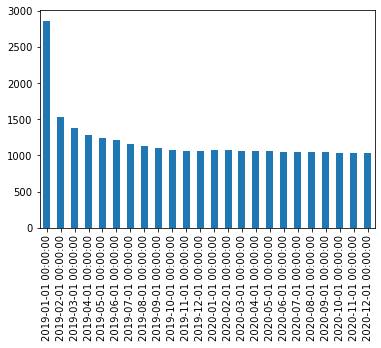

In [15]:
#Январь 2019 — декабрь 2020
df.iloc[0].plot(kind='bar')

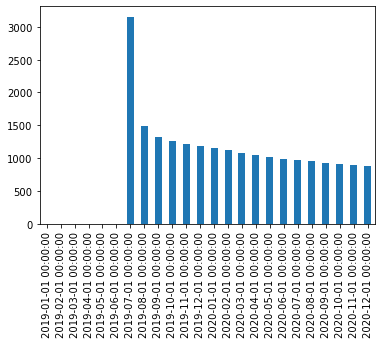

In [16]:
#Июнь 2019 — декабрь 2020
df.iloc[6].plot(kind='bar')

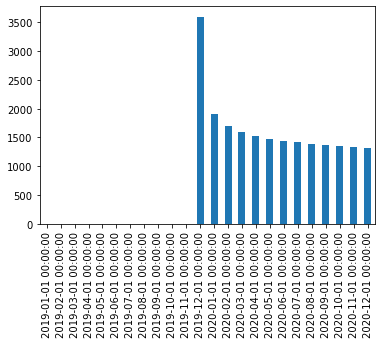

In [17]:
#Декабрь 2019 — декабрь 2020
df.iloc[11].plot(kind='bar')

Видно, что в целом выглядит правдоподобно, хотя, конечно, тут всё зиждется на эвристиках и допущениях.

Ну и наконец заполним все пропущенные значения нулями и посчитаем в последнем ряду датафрейма MAU (суммы по колонкам):

In [19]:
df.fillna(0, inplace=True)
df.loc['MAU',:]= df.sum(axis=0)

In [20]:
df

,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,2020-01-01,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01,2020-12-01
2019-01-01 00:00:00,2864.0,1528.0,1380.0,1285.0,1246.0,1215.0,1162.0,1128.0,1096.0,1075.0,1058.0,1058.0,1078.419720,1071.027086,1064.690542,1059.198870,1054.393658,1050.153764,1046.384970,1043.012891,1039.978020,1037.232184,1034.735970,1032.456818
2019-02-01 00:00:00,0.0,2813.0,1574.0,1375.0,1299.0,1254.0,1202.0,1165.0,1133.0,1109.0,1082.0,1085.0,1079.395598,1067.038951,1056.447539,1047.268315,1039.236495,1032.149594,1025.850127,1020.213762,1015.141033,1010.551421,1006.379047,1002.569487
2019-03-01 00:00:00,0.0,0.0,3435.0,1822.0,1613.0,1515.0,1451.0,1400.0,1376.0,1348.0,1314.0,1303.0,1286.362938,1267.069266,1250.531832,1236.199389,1223.658502,1212.593013,1202.757023,1193.956401,1186.035840,1178.869619,1172.354873,1166.406626
2019-04-01 00:00:00,0.0,0.0,0.0,3024.0,1702.0,1506.0,1418.0,1366.0,1328.0,1310.0,1271.0,1252.0,1233.348352,1210.005467,1189.997280,1172.656851,1157.483976,1144.096144,1132.195850,1121.548218,1111.965350,1103.295135,1095.413122,1088.216501
2019-05-01 00:00:00,0.0,0.0,0.0,0.0,3130.0,1792.0,1596.0,1509.0,1460.0,1416.0,1384.0,1360.0,1334.907950,1303.129716,1275.891229,1252.284541,1231.628689,1213.402937,1197.202269,1182.706934,1169.661133,1157.857788,1147.127476,1137.330234
2019-06-01 00:00:00,0.0,0.0,0.0,0.0,0.0,3195.0,1678.0,1513.0,1432.0,1387.0,1341.0,1328.0,1298.299881,1261.096178,1229.207290,1201.570254,1177.387847,1156.050429,1137.083835,1120.113725,1104.840626,1091.022108,1078.459818,1066.989902
2019-07-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,3156.0,1481.0,1321.0,1255.0,1208.0,1189.0,1160.881251,1116.434654,1078.337572,1045.320100,1016.429812,990.938382,968.279332,948.005446,929.758949,913.250213,898.242271,884.539368
2019-08-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3157.0,1482.0,1340.0,1266.0,1238.0,1215.852081,1158.848626,1109.988522,1067.643099,1030.590853,997.897695,968.837111,942.835535,919.434117,898.261405,879.013485,861.439297
2019-09-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3385.0,1748.0,1587.0,1524.0,1509.923076,1422.866861,1348.247249,1283.576919,1226.990380,1177.061080,1132.679481,1092.969629,1057.230762,1024.895597,995.499992,968.660527
2019-10-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3337.0,1807.0,1660.0,1660.000000,1535.615385,1429.000000,1336.600000,1255.750000,1184.411765,1121.000000,1064.263158,1013.200000,967.000000,925.000000,886.652174
